In [1]:
import modelo_neuronio
import parameters

import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'Arial'

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['pdf.fonttype'] = 42

# Suporte

In [3]:
def conta_pa(V, limiar = 0, dt = 0.01e-3, t = 200e-3):
        
    tempos_pa = np.where((V[1:] >= limiar) & (V[:-1] <= limiar))[0]
   
    return tempos_pa, len(tempos_pa)

def CalculaFISI(spike_times, dt = 0.01e-3, t = 100e-3):
    if len(spike_times) > 2: return 1/(dt*(spike_times[1:] - spike_times[:-1]).mean())
    else: 0

# Simulação

In [6]:
# Parâmetros de simulação
dt = 0.01e-3  # Passo de tempo (ms)
tf = 200e-3  # Duração da simulação (ms)
I_config = {'Init': 50e-3, 'End': 150e-3, 'A': 0.0265}

p = parameters.define_neuron_parameters()

# Rodando o modelo
V, Ca, K = modelo_neuronio.neuron_model(tf, dt, p, I_config)

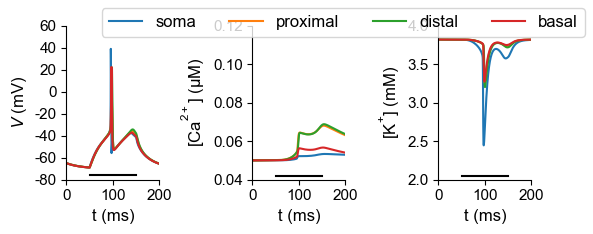

In [7]:
# Plotando o resultado
t = np.linspace(0, tf, V.shape[0])

label = ['soma', 'proximal', 'distal', 'basal']

fig, ax = plt.subplots(1, 3, figsize=(6, 2))
plt.subplots_adjust(wspace = 1)

for i in range(4):         
    ax[0].plot(t*1e3, V[:, i]*1e3, label=label[i])
    ax[1].plot(t*1e3, Ca[:, i]*1e6)
    ax[2].plot(t*1e3, K[:, i]*1e3)
    
ax[0].plot([50, 150], [-76, -76], 'k-')
ax[0].set_xlabel('t (ms)', fontsize = 12)
ax[0].set_xlim(0, tf*1e3)
ax[0].set_ylabel(r'$V~\mathrm{(mV)}$', fontsize = 12)
ax[0].set_ylim(-80, 60)
ax[0].set_yticks([-80, -60, -40, -20, 0, 20, 40, 60])
ax[0].set_yticklabels([-80, -60, -40, -20, 0, 20, 40, 60])

ax[1].plot([50, 150], [0.042, 0.042], 'k-')
ax[1].set_xlabel('t (ms)', fontsize = 12)
ax[1].set_xlim(0, tf*1e3)
ax[1].set_ylabel(r'$\mathrm{[Ca^{2+}]}~\mathrm{(\mu M)}$', fontsize = 12)
ax[1].set_ylim(0.04, 0.12)

ax[2].plot([50, 150], [2.05, 2.05], 'k-')
ax[2].set_xlabel('t (ms)', fontsize = 12)
ax[2].set_xlim(0, tf*1e3)
ax[2].set_ylabel(r'$\mathrm{[K^{+}]}~\mathrm{(m M)}$', fontsize = 12)
ax[2].set_ylim(2, 4)

for axis in ax.flatten():
    for spine in ('right', 'top'): axis.spines[spine].set_visible(False)
    axis.tick_params(axis = 'both', which = 'both', labelsize = 11)

        
fig.legend(ncols = 4, fontsize = 12)

file_name = 'TimeSeries'
#fig.savefig(f'{file_name}.pdf', format='pdf', dpi = 300, bbox_inches='tight')
#fig.savefig(f'{file_name}.png', format='png', dpi = 300, bbox_inches='tight')

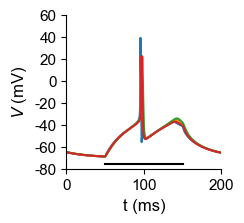

In [10]:
# Plotando o resultado
t = np.linspace(0, tf, V.shape[0])

label = ['soma', 'proximal', 'distal', 'basal']

fig, ax = plt.subplots(1, 1, figsize=(6/3, 2))
plt.subplots_adjust(wspace = 1)

for i in range(4):         
    ax.plot(t*1e3, V[:, i]*1e3, label=label[i])

    
ax.plot([50, 150], [-76, -76], 'k-')
ax.set_xlabel('t (ms)', fontsize = 12)
ax.set_xlim(0, tf*1e3)
ax.set_ylabel(r'$V~\mathrm{(mV)}$', fontsize = 12)
ax.set_ylim(-80, 60)
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60])
ax.set_yticklabels([-80, -60, -40, -20, 0, 20, 40, 60])


for spine in ('right', 'top'): ax.spines[spine].set_visible(False)
ax.tick_params(axis = 'both', which = 'both', labelsize = 11)

        
#fig.legend(ncols = 4, fontsize = 12)

file_name = 'TimeSeries'
#fig.savefig(f'{file_name}.pdf', format='pdf', dpi = 300, bbox_inches='tight')
#fig.savefig(f'{file_name}.png', format='png', dpi = 300, bbox_inches='tight')

## Test 1: f-I

In [25]:
# Parâmetros de simulação
dt = 0.01e-3  # Passo de tempo (ms)
tf = 250e-3 + 1700e-3 + 250e-3  # Duração da simulação (ms)

p = parameters.define_neuron_parameters()

A_list = np.linspace(0.025, 0.03, 50)
n_spikes = np.zeros(len(A_list))

for i_A, A in enumerate(A_list):
    
    I_config = {'Init': 250e-3, 'End': 250e-3 + 1700e-3, 'A': A}

    # Rodando o modelo
    V, Ca, K = modelo_neuronio.neuron_model(tf, dt, p, I_config)
    
    n_spikes[i_A] = conta_pa(V[:, 0])[1]

In [35]:
A_list = np.linspace(0.025, 0.03, 50)
n_spikes = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  5.,  6.,  7.,  9.,
       10., 12., 13., 15., 17., 19., 21., 24., 27., 31., 35., 40., 46.,
       47., 48., 48., 49., 49., 50., 51., 51., 52., 52., 52.])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  5.,  6.,  7.,  9.,
       10., 12., 13., 15., 17., 19., 21., 24., 27., 31., 35., 40., 46.,
       47., 48., 48., 49., 49., 50., 51., 51., 52., 52., 52.])

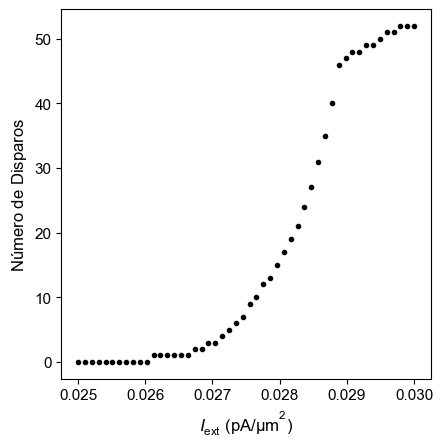

In [42]:
fig, ax = plt.subplots(1,1)
ax.set_box_aspect(1)

ax.plot(A_list, n_spikes, 'k.')

ax.tick_params(axis = 'both', which = 'both', labelsize = 11)

ax.set_ylabel(r'$\mathrm{Número~de~Disparos}$', fontsize = 12)
ax.set_xlabel(r'$I_\mathrm{ext}~\mathrm{(pA/\mu m^2)}$', fontsize = 12)

file_name = 'Curvaf-I'
fig.savefig(f'{file_name}.pdf', format='pdf', dpi = 300, bbox_inches='tight')
fig.savefig(f'{file_name}.png', format='png', dpi = 300, bbox_inches='tight')

## Teste Ca

In [109]:
# Parâmetros de simulação
dt = 0.01e-3  # Passo de tempo (ms)
tf = 500e-3  # Duração da simulação (ms)
I_config = {'Init': 50e-3, 'End': 450e-3, 'A': 5e-2}

p = parameters.define_neuron_parameters()

p['g_HVA'] = p['g_HVA']*10

# Rodando o modelo
V, Ca, K = modelo_neuronio.neuron_model(tf, dt, p, I_config)

In [127]:
# Parâmetros de simulação
dt = 0.01e-3  # Passo de tempo (ms)
tf = 500e-3  # Duração da simulação (ms)
I_config = {'Init': 50e-3, 'End': 450e-3, 'A': 5e-2}


g_HVA_list = np.concatenate((1/np.arange(2, 25, 1)[::-1], np.arange(0, 25, 1)))
f_comparts = np.zeros(shape = (4, len(g_HVA_list)))
max_Ca = np.zeros(shape = (4, len(g_HVA_list)))

for i_g, g in enumerate(g_HVA_list):
    
    p = parameters.define_neuron_parameters()
    p['g_HVA'] = p['g_HVA']*g

    # Rodando o modelo
    V, Ca, K = modelo_neuronio.neuron_model(tf, dt, p, I_config)
    
    for iv in range(4):
        
        spike_times = conta_pa(V[:, iv])[0]
        f_comparts[iv, i_g] = CalculaFISI(spike_times, t = 400e-3)
        
        max_Ca[iv, i_g] = max(Ca[:, iv])

In [22]:
max_Ca = np.array([[5.08001953e-08, 5.08349768e-08, 5.08729193e-08, 5.09144743e-08,
        5.09601835e-08, 5.10107026e-08, 5.10668330e-08, 5.11295646e-08,
        5.12001347e-08, 5.12801103e-08, 5.13715059e-08, 5.14769560e-08,
        5.15999722e-08, 5.17453430e-08, 5.19197707e-08, 5.21329352e-08,
        5.23993527e-08, 5.27418283e-08, 5.31983584e-08, 5.38373076e-08,
        5.47953306e-08, 5.64750622e-08, 5.97120127e-08, 5.00000000e-08,
        6.93987494e-08, 8.92744976e-08, 1.09035756e-07, 1.29974079e-07,
        1.51648467e-07, 1.74115530e-07, 1.97386306e-07, 2.21611266e-07,
        2.46859753e-07, 2.73273485e-07, 3.00831851e-07, 3.31454038e-07,
        3.62222592e-07, 4.93515474e-07, 5.33374676e-07, 5.69240411e-07,
        6.04022717e-07, 6.39002211e-07, 6.75561182e-07, 7.11103385e-07,
        7.46874688e-07, 7.83027168e-07, 8.19219554e-07, 8.54026102e-07],
       [5.32962999e-08, 5.34391479e-08, 5.35949393e-08, 5.37655178e-08,
        5.39530929e-08, 5.41603398e-08, 5.43905247e-08, 5.46476789e-08,
        5.49368396e-08, 5.52643795e-08, 5.56384866e-08, 5.60698544e-08,
        5.65727260e-08, 5.71664965e-08, 5.78782766e-08, 5.87471575e-08,
        5.98316537e-08, 6.12234905e-08, 6.30751006e-08, 6.56598877e-08,
        6.95222683e-08, 7.59255923e-08, 8.86341382e-08, 5.00000000e-08,
        1.26406565e-07, 2.01862431e-07, 2.79024075e-07, 3.59000695e-07,
        4.42632556e-07, 5.30722591e-07, 6.24172555e-07, 7.24071279e-07,
        8.31797006e-07, 9.49157138e-07, 1.07860254e-06, 1.22371649e-06,
        1.38970965e-06, 1.81539579e-06, 1.98173432e-06, 2.14355813e-06,
        2.30595120e-06, 2.46849416e-06, 2.63161000e-06, 2.79508590e-06,
        2.95840359e-06, 3.12259335e-06, 3.28454047e-06, 3.44688735e-06],
       [5.31357180e-08, 5.32716352e-08, 5.34198705e-08, 5.35821779e-08,
        5.37606624e-08, 5.39578691e-08, 5.41769075e-08, 5.44216162e-08,
        5.46967902e-08, 5.50084975e-08, 5.53645340e-08, 5.57750826e-08,
        5.62537056e-08, 5.68188762e-08, 5.74964135e-08, 5.83235565e-08,
        5.93560472e-08, 6.06812831e-08, 6.24445258e-08, 6.49063734e-08,
        6.85858819e-08, 7.46879772e-08, 8.68047813e-08, 5.00000000e-08,
        1.22865285e-07, 1.95062719e-07, 2.69202554e-07, 3.46442080e-07,
        4.27820799e-07, 5.14370499e-07, 6.07357054e-07, 7.08419670e-07,
        8.19927373e-07, 9.45022389e-07, 1.08829157e-06, 1.25569635e-06,
        1.45379450e-06, 1.94828761e-06, 2.12694220e-06, 2.29768204e-06,
        2.46773869e-06, 2.63725733e-06, 2.80586117e-06, 2.97430380e-06,
        3.14176647e-06, 3.30841927e-06, 3.47378210e-06, 3.63788615e-06],
       [5.10444002e-08, 5.10897941e-08, 5.11393133e-08, 5.11935469e-08,
        5.12532020e-08, 5.13191339e-08, 5.13923893e-08, 5.14742591e-08,
        5.15663580e-08, 5.16707315e-08, 5.17900080e-08, 5.19276253e-08,
        5.20881665e-08, 5.22778799e-08, 5.25055115e-08, 5.27836937e-08,
        5.31313707e-08, 5.35783029e-08, 5.41740798e-08, 5.50079365e-08,
        5.62582777e-08, 5.83412497e-08, 6.25052898e-08, 5.00000000e-08,
        7.50085008e-08, 1.00253916e-07, 1.26075295e-07, 1.52696134e-07,
        1.80308637e-07, 2.09109293e-07, 2.39323004e-07, 2.71237967e-07,
        3.05214883e-07, 3.41754153e-07, 3.81605180e-07, 4.25995154e-07,
        4.77354429e-07, 5.80930228e-07, 6.24349782e-07, 6.70600633e-07,
        7.18513493e-07, 7.67335601e-07, 8.18113241e-07, 8.70638987e-07,
        9.25776677e-07, 9.85554306e-07, 1.03966108e-06, 1.09507353e-06]])

In [23]:
f_comparts = np.array([[0.04061848, 0.0406163 , 0.04061413, 0.04061196, 0.0406087 ,
        0.04060543, 0.04060217, 0.04059783, 0.04059348, 0.04058804,
        0.04058261, 0.040575  , 0.04056739, 0.0405587 , 0.04054783,
        0.0405337 , 0.0405163 , 0.04049565, 0.0404663 , 0.04042609,
        0.0403663 , 0.04027917, 0.04007604, 0.04067065, 0.03950313,
        0.03841   , 0.03735   , 0.03632692, 0.03531852, 0.0343125 ,
        0.0333    , 0.03226833, 0.03120403, 0.03009531, 0.02892424,
        0.027725  , 0.02639167, 0.01636822, 0.01604609, 0.01522121,
        0.01501455, 0.01461066, 0.01463169, 0.0143027 , 0.01458176,
        0.01411867, 0.01373196, 0.01378878],
       [0.04062717, 0.040625  , 0.04062283, 0.04061957, 0.0406163 ,
        0.04061304, 0.04060978, 0.04060543, 0.04060109, 0.04059565,
        0.04059022, 0.0405837 , 0.04057609, 0.0405663 , 0.04055543,
        0.0405413 , 0.040525  , 0.04050326, 0.040475  , 0.0404337 ,
        0.040375  , 0.04030833, 0.04008438, 0.04067826, 0.03951042,
        0.038418  , 0.037358  , 0.03633558, 0.03532685, 0.03432143,
        0.03330862, 0.03228167, 0.03121452, 0.03010391, 0.02893258,
        0.02774   , 0.02639931, 0.0224375 , 0.205155  , 0.2510625 ,
        0.33498333, 0.33106667, 0.25939375, 0.35259167, 0.2693375 ,
        0.26431875, 0.5421625 , 0.21483   ],
       [0.04063261, 0.04062935, 0.04062717, 0.040625  , 0.04062174,
        0.04061848, 0.04061522, 0.04061087, 0.04060652, 0.04060109,
        0.04059457, 0.04058804, 0.04058152, 0.04057174, 0.04056087,
        0.04054674, 0.04053043, 0.0405087 , 0.04048043, 0.04044022,
        0.04037935, 0.04034375, 0.04009167, 0.04068261, 0.03951458,
        0.038423  , 0.037363  , 0.03634038, 0.03533148, 0.03432679,
        0.0333181 , 0.0322975 , 0.031225  , 0.03010625, 0.02893409,
        0.02775357, 0.02639792, 0.023     , 0.34133333, 0.0212625 ,
        0.334775  ,        np.nan, 0.5180625 ,        np.nan, 0.35816667,
        0.527425  ,        np.nan,        np.nan],
       [0.04062391, 0.04062174, 0.04061848, 0.0406163 , 0.04061304,
        0.04060978, 0.04060652, 0.04060217, 0.04059891, 0.04059348,
        0.04058804, 0.04058043, 0.04057283, 0.04056304, 0.04055217,
        0.04053913, 0.04052174, 0.0405    , 0.04047174, 0.04043152,
        0.04037174, 0.04029792, 0.04008125, 0.040675  , 0.03950833,
        0.038415  , 0.037355  , 0.03633269, 0.03532407, 0.03431875,
        0.0333069 , 0.03227917, 0.03121371, 0.03010469, 0.02893485,
        0.02774286, 0.02640417, 0.02292143, 0.256925  , 0.33529167,
        0.33565833, 0.33155833, 0.3466    , 0.35328333, 0.26996875,
        0.265     , 0.36218333, 0.215415  ]])

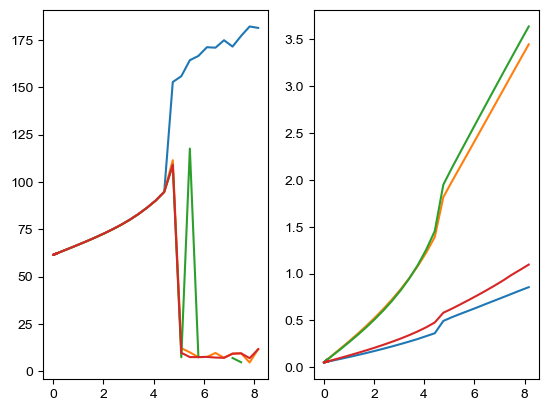

In [24]:
fig, ax = plt.subplots(1, 2)

g_HVA_list = np.concatenate((1/np.arange(2, 25, 1)[::-1], np.arange(0, 25, 1)))

#0.34, 0.7 , 0.7 , 0.34
max_Ca
for i in range(4):
    ax[0].plot(0.34*g_HVA_list, 1/(f_comparts[i]*400e-3))
    ax[1].plot(0.34*g_HVA_list, max_Ca[i]*1e6)

### d_shell Test

In [ ]:
# Parâmetros de simulação
dt = 0.01e-3  # Passo de tempo (ms)
tf = 500e-3  # Duração da simulação (ms)
I_config = {'Init': 50e-3, 'End': 450e-3, 'A': 2.7e-2}


d_shell_list = np.concatenate((1/np.arange(2, 50, 2)[::-1], np.arange(1, 51, 2)))

f_comparts = np.zeros(shape = (4, len(d_shell_list)))
f_rate = np.zeros(shape = (4, len(d_shell_list)))
max_Ca = np.zeros(shape = (4, len(d_shell_list)))

for i_d, d in enumerate(d_shell_list):
    
    p = parameters.define_neuron_parameters()
    p['Vol'] = p['Vol']*d

    # Rodando o modelo
    V, Ca, K = modelo_neuronio.neuron_model(tf, dt, p, I_config)
    
    for iv in range(4):
        
        spike_times = conta_pa(V[:, iv])[0]
        f_comparts[iv, i_d] = CalculaFISI(spike_times, t = 400e-3)
        f_rate[iv, i_d] = len(spike_times)
        
        max_Ca[iv, i_d] = max(Ca[:, iv])

In [ ]:
fig, ax = plt.subplots(1, 2)

d_shell_list = np.concatenate((1/np.arange(2, 50, 2)[::-1], np.arange(1, 51, 2)))

#0.34, 0.7 , 0.7 , 0.34
max_Ca
for i in range(4):
    ax[0].plot(2e-10*d_shell_list, f_rate[i])
    ax[1].plot(2e-10*d_shell_list, max_Ca[i]*1e6)
    
#ax[0].plot([2e-10, 2e-10], [63, 63.4])